# Trabalho Final - Análise de Dados com Python

## Enunciado

O departamento de crédito da QuantumFinance solicitou a criação de um algoritmo para prever o preço de venda de suas casas com base em várias características. Eles coletaram dados de vendas recentes, incluindo informações como o tamanho da casa (em pés quadrados), o número de quartos, o número de banheiros, a idade da casa (em anos) e a proximidade com o centro da cidade (em quilômetros).

O objetivo é desenvolver um modelo de Regressão Linear Multivariada que preveja o preço de venda das casas com base nessas características. Para isso, você recebeu um conjunto de dados contendo informações de venda de várias casas, incluindo o preço de venda e as características mencionadas anteriormente.

Seu trabalho é:

1. Explorar e analisar os dados para entender a distribuição das características e a relação com o preço de venda.

2. Dividir o conjunto de dados em conjuntos de treinamento e teste.

3. Desenvolver um modelo de Regressão Linear Multivariada utilizando as características como variáveis independentes e o preço de venda como variável dependente.

4. Avaliar o desempenho do modelo usando métricas como o RMSE abaixo de 69000.

5. Fazer previsões do preço de venda para novas casas com base nas características fornecidas.

#### Entregáveis:

Jupyter Notebook:  O notebook deverá estar bem organizado com seções claras e textos que facilitem a compreensão da análise e decisões tomadas e que permita a obtenção do resultado final a partir do dataset disponibilizado.

* [dataset](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)

Links úteis:

[MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

[Regressao Linear](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

[Train_Test_Split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)

## Importação da Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


## Leitura dos dados

In [2]:
housing = pd.read_csv('bases/housing.csv')
display(housing.head())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Exploração e analise dos dados

In [3]:
display(housing.describe().round(2))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.00,20640.00,20640.00,20640.00,20433.00,20640.00,20640.00,20640.00,20640.00
mean,-119.57,35.63,28.64,2635.76,538.07,1425.48,499.54,3.87,206855.82
std,2.00,2.14,12.59,2181.62,422.30,1132.46,382.33,1.90,115395.62
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1447.75,296.00,787.00,280.00,2.56,119600.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.53,179700.00
75%,-118.01,37.71,37.00,3148.00,647.00,1725.00,605.00,4.74,264725.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [4]:
# Verificando se possuem valore nulos
null_values = housing.isnull().sum()
print(null_values)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [5]:
#Eliminando os valores nulos
housing = housing.dropna()
display(housing.describe().round(2))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-119.57,35.63,28.63,2636.50,538.07,1424.95,499.43,3.87,206864.41
std,2.00,2.14,12.59,2185.27,422.30,1133.21,382.30,1.90,115435.67
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00


In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
# Substituindo os valores categóricos de ocean_proximity por valores numéricos
mapping = {
    'NEAR BAY': 0,
    '<1H OCEAN': 1,
    'INLAND': 2,
    'NEAR OCEAN': 3,
    'ISLAND': 4
}
housing['ocean_proximity'] = housing['ocean_proximity'].map(mapping)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,0


### Correlação entre as variáveis

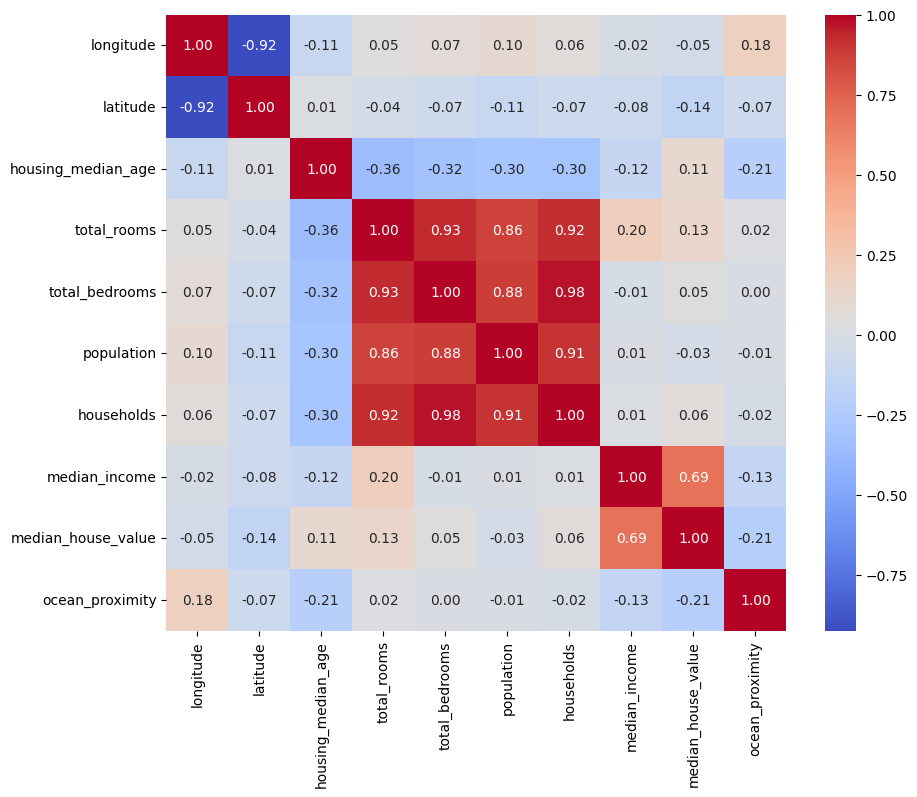

In [8]:
# Criando uma matriz de correlação entre as variáveis
correlation_matrix = housing.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

### Conclusão:
Verficamos uma alta correlação entre o valor médio da casa e o valor médio da renda. Isso significa que, em média conforme a renda aumenta o valor das casa também tende a aumentar.
Há uma forte correlação positiva entre o total de cômodos, total de quartos, população e familias. Isso indica que áreas com mais cômodos e quartos tendem a ter mais população e familias.
Existe uma baixa correlação entre a proximidade com o oceano e o valor médio da casa, sugerindo que a proximidade do oceano tem um impacto menor no preço médio da casa.

### Box Plot

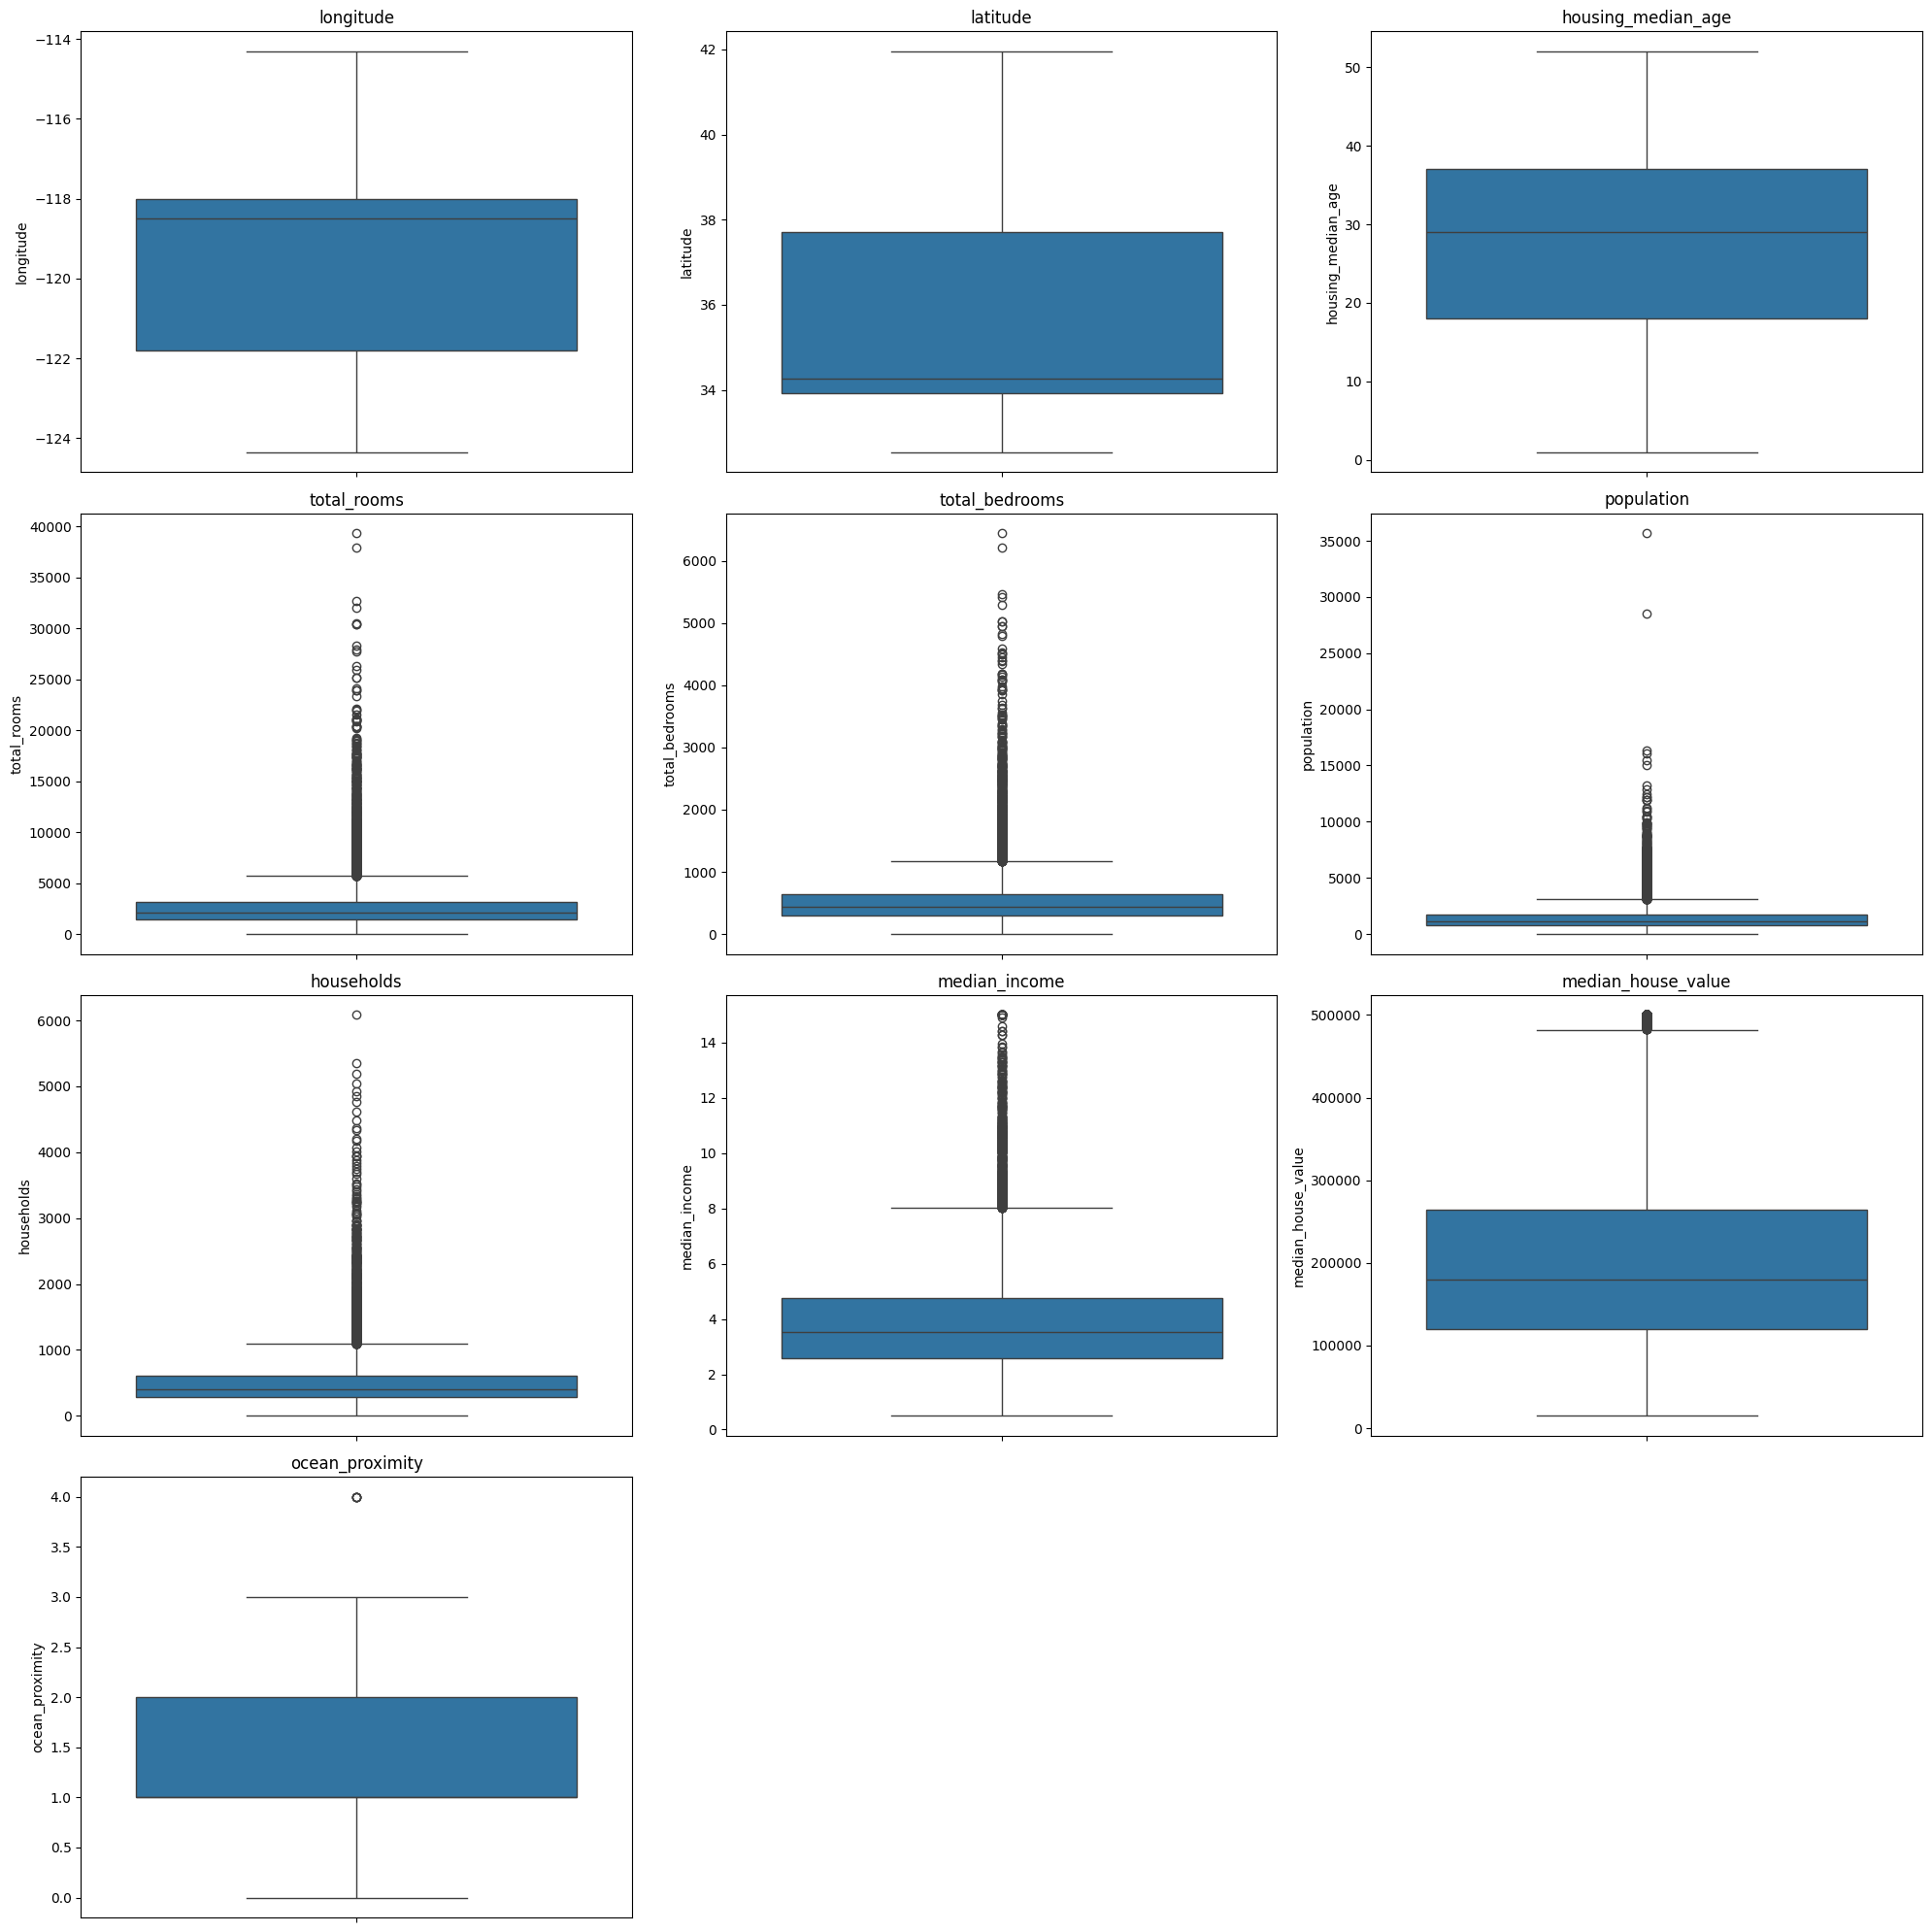

In [9]:
# Detectando outliers
plt.figure(figsize=(20, 20))
numeric_columns = housing.select_dtypes(include='number').columns
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(len(numeric_columns) // 3 + 1, 3, i)
    sns.boxplot(y=housing[column])
    plt.title(f'{column}')

plt.tight_layout()
plt.show()

### Conclusão:
Notamos que o preço médio das casas varia entre 100.000 a 300.000 com alguns outliers em torno de 500.000. Isso sugere que a maioria das casa está em um preço médio moderada.

In [10]:
# Removendo os outliers utilizando o método IQR

def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]


for coluna in housing.columns:
    df = remove_outliers_iqr(housing, coluna)

housing.describe().round(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00,20433.00
mean,-119.57,35.63,28.63,2636.50,538.07,1424.95,499.43,3.87,206864.41,1.46
std,2.00,2.14,12.59,2185.27,422.30,1133.21,382.30,1.90,115435.67,0.85
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00,0.00
25%,-121.80,33.93,18.00,1450.00,296.00,787.00,280.00,2.56,119500.00,1.00
50%,-118.49,34.26,29.00,2127.00,435.00,1166.00,409.00,3.54,179700.00,1.00
75%,-118.01,37.72,37.00,3143.00,647.00,1722.00,604.00,4.74,264700.00,2.00
max,-114.31,41.95,52.00,39320.00,6445.00,35682.00,6082.00,15.00,500001.00,4.00


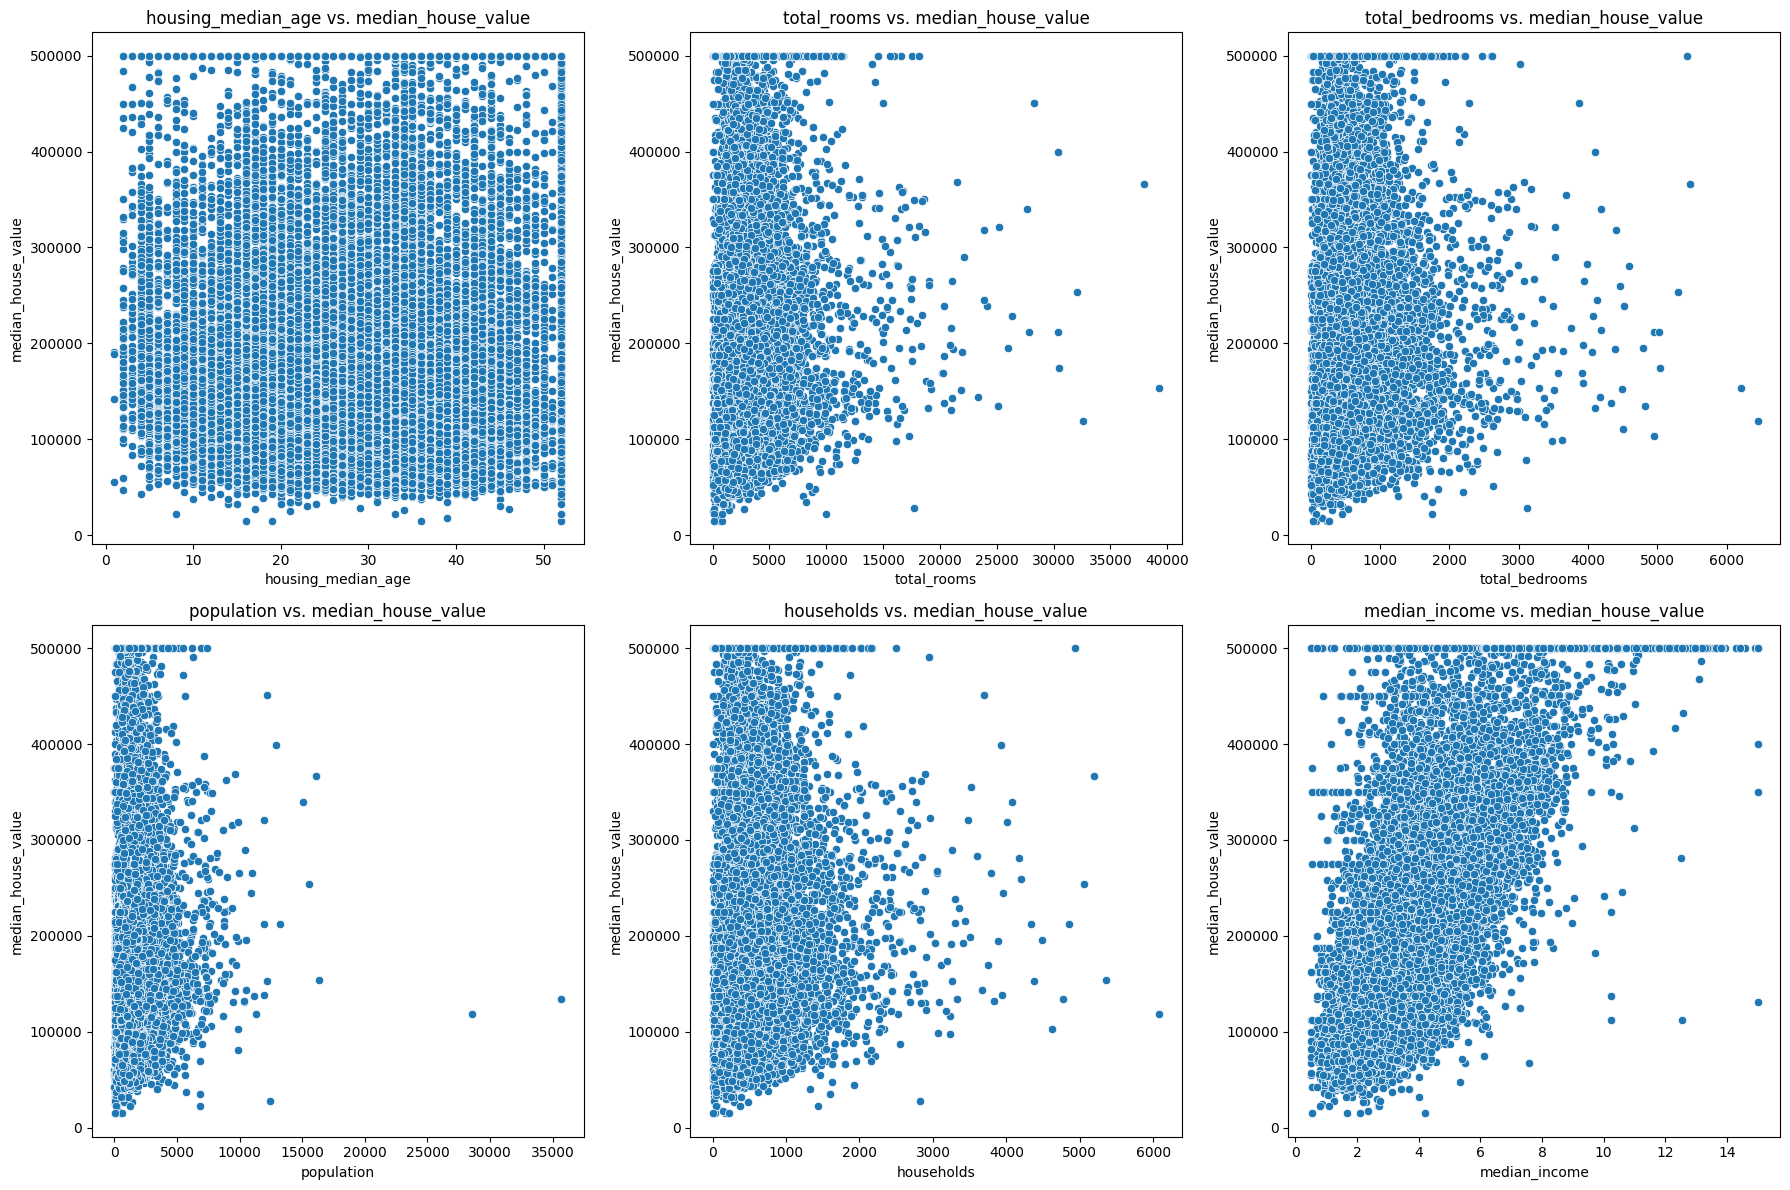

In [11]:
# Relacionando as variaveis com o valor médio das casas

colunas = ['housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, col in enumerate(colunas):
    row = i // 3
    col = i % 3
    sns.scatterplot(x=colunas[i], y='median_house_value', data=df, ax=axs[row, col])
    axs[row, col].set_title(f'{colunas[i]} vs. median_house_value')

plt.tight_layout()
plt.show()

### Conclusão:
Podemos observar que conforme a média da renda aumenta o preço médio da casa também tende a aumentar. 
Notamos que a idade média das casa mostra uma distribuição uniforme em relação ao preço médio das casas, mostrando que não existe uma tendencia clara.

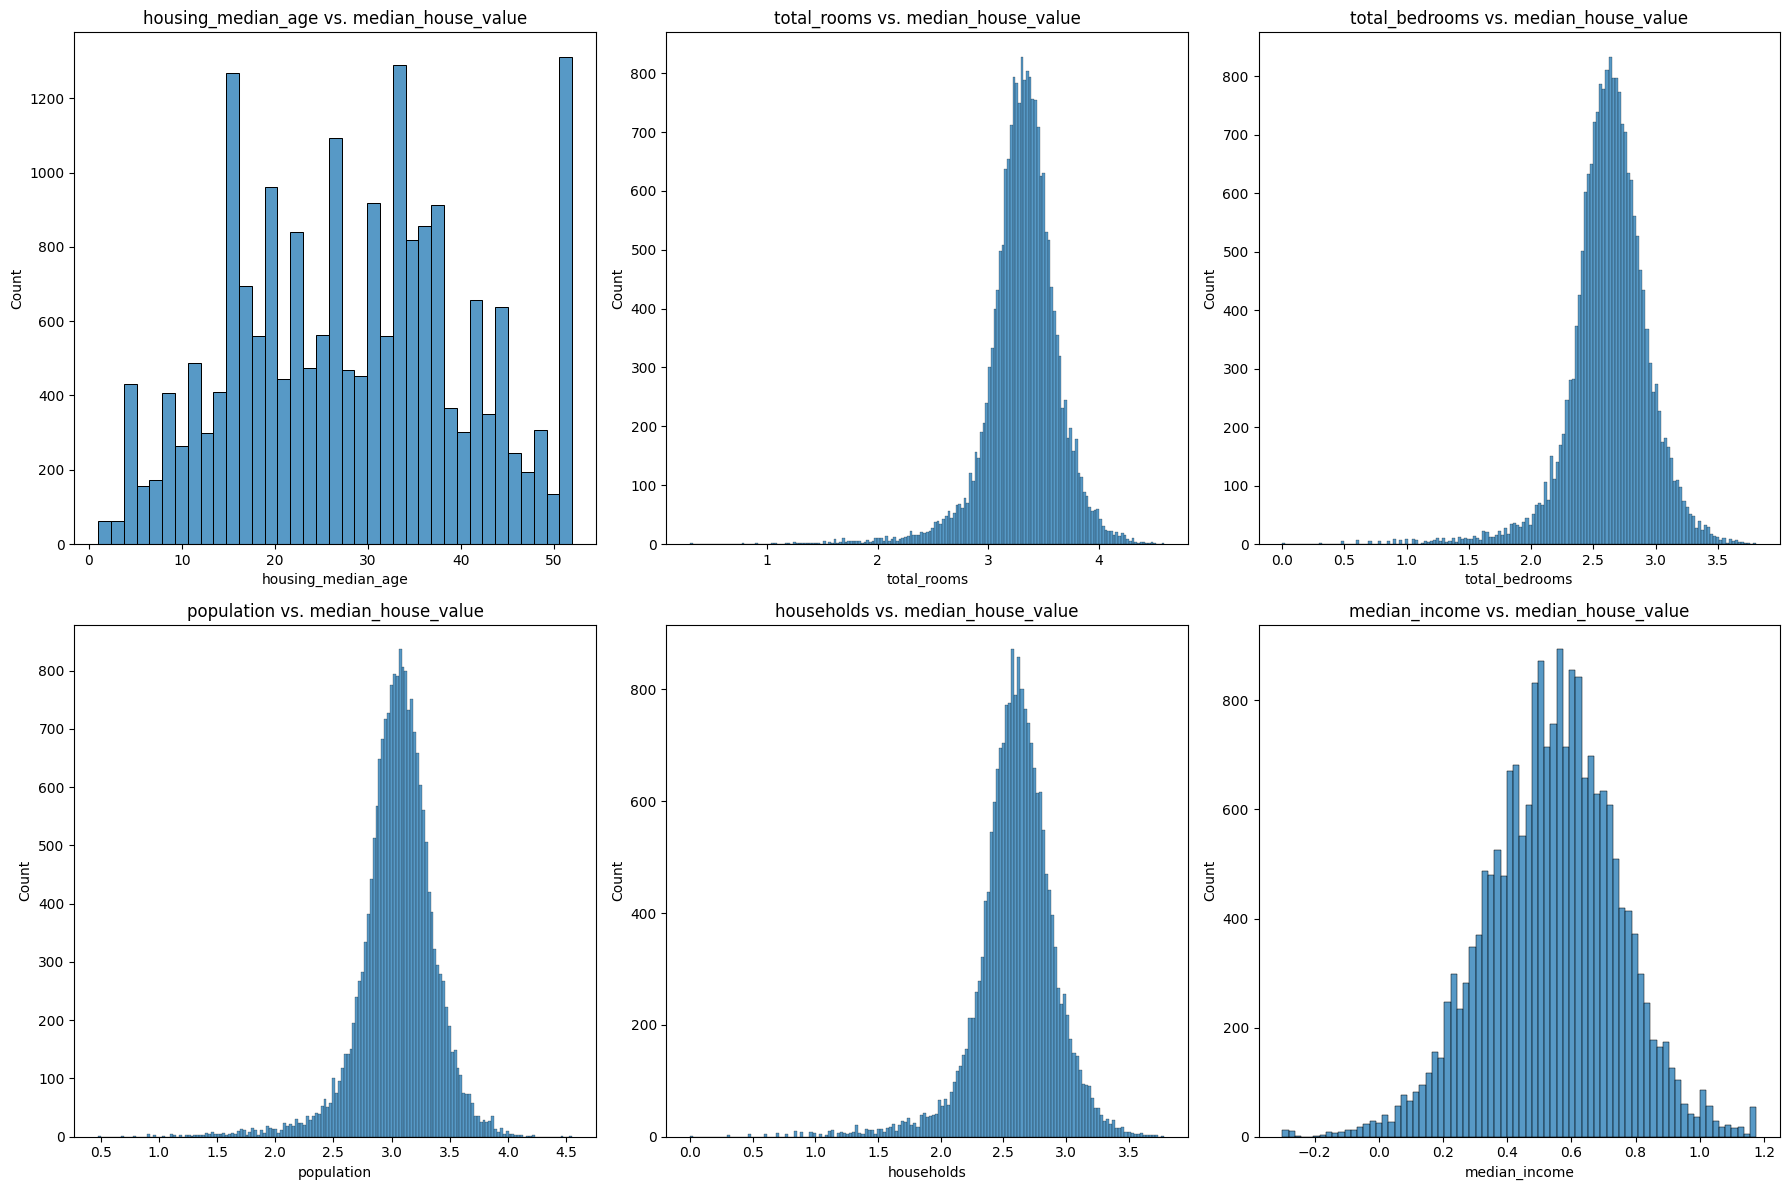

In [12]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))
for i, col in enumerate(colunas):
    df = housing
    if i != 0:
        df = pd.DataFrame(data=np.log10(housing[col]))
    row = i // 3
    col = i % 3
    sns.histplot(x=colunas[i], data=df, ax=axs[row, col])
    axs[row, col].set_title(f'{colunas[i]} vs. median_house_value')

plt.tight_layout()
plt.show()

## Regressão Linear

In [13]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dividindo os dados em variáveis independentes (X) e dependentes (y)
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinando o modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

# Calculando o RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'RMSE: {rmse}')


RMSE: 70107.65434298


In [14]:
from sklearn.preprocessing import StandardScaler

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados normalizados em conjuntos de treinamento e teste
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinando o modelo de Regressão Linear com dados normalizados
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculando o RMSE
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f'RMSE com normalização: {rmse_scaled}')


RMSE com normalização: 70107.65434298017


In [15]:
# Função para remover outliers utilizando IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return df[(df[column] >= limite_inferior) & (df[column] <= limite_superior)]

# Removendo outliers de todas as colunas
for coluna in housing.columns:
    housing = remove_outliers_iqr(housing, coluna)

# Dividindo os dados em variáveis independentes (X) e dependentes (y)
X = housing.drop(columns=['median_house_value'])
y = housing['median_house_value']

# Normalizando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados normalizados em conjuntos de treinamento e teste
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Treinando o modelo de Regressão Linear com dados normalizados e sem outliers
model_scaled = LinearRegression()
model_scaled.fit(X_train_scaled, y_train)

# Fazendo previsões no conjunto de teste
y_pred_scaled = model_scaled.predict(X_test_scaled)

# Calculando o RMSE
rmse_scaled = np.sqrt(mean_squared_error(y_test, y_pred_scaled))
print(f'RMSE com remoção de outliers e normalização: {rmse_scaled}')


RMSE com remoção de outliers e normalização: 57596.83490983785


### Previsões de preço de venda para novas casas

In [16]:
def prever_preco_venda(nova_casa):
    """
    Função para prever o preço de venda de uma nova casa com base nas características fornecidas.

    Parâmetros:
    nova_casa (dict): Um dicionário contendo as características da nova casa.

    Retorno:
    float: Preço previsto da casa.
    """
    # Convertendo o dicionário em um DataFrame
    nova_casa_df = pd.DataFrame([nova_casa])

    # Mapeando a variável categórica 'ocean_proximity' se presente
    if 'ocean_proximity' in nova_casa_df:
        nova_casa_df['ocean_proximity'] = nova_casa_df['ocean_proximity'].map(mapping)

    # Normalizando os dados da nova casa
    nova_casa_scaled = scaler.transform(nova_casa_df)

    # Fazendo a previsão
    preco_previsto = model_scaled.predict(nova_casa_scaled)

    return preco_previsto[0]

# Exemplo de uso da função
nova_casa_exemplo = {
    'longitude': -122.23,
    'latitude': 37.88,
    'housing_median_age': 41.0,
    'total_rooms': 880.0,
    'total_bedrooms': 129.0,
    'population': 322.0,
    'households': 126.0,
    'median_income': 8.3252,
    'ocean_proximity': 'NEAR BAY'
}

preco_previsto = prever_preco_venda(nova_casa_exemplo)
print(f'O preço previsto para a nova casa é: ${preco_previsto:,.2f}')


O preço previsto para a nova casa é: $402,629.16
